In [120]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.3f}'.format

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

import statsmodels.api as sm



from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [121]:
def compute_ks(y_test, y_pred_test):
    return stats.ks_2samp(y_pred_test[y_test == 1.0],y_pred_test[y_test == 0.0])[0]

## 1. Load Data

In [122]:
df = pd.read_csv("../data/interim/out3_antigo.csv")

In [123]:
df.head()

EVER60  ClientId                       M0 DATA_CONTRATACAO_CREDITO  \
0       0   1222253  2019-05-10 00:00:00.000  2019-01-31 15:00:57.807   
1       0   1083235  2019-05-03 00:00:00.000  2019-01-09 17:53:27.243   
2       0   1420701  2019-05-24 00:00:00.000  2019-03-12 09:11:25.390   
3       1   1556802  2019-05-10 00:00:00.000  2019-04-02 09:35:33.130   
4       0   1296007  2019-05-31 00:00:00.000  2019-04-15 16:03:03.327   

   VALUE_ACCOUNT_CREDIT_INFLOW  VALUE_INVOICE_PAYMENT_INFLOW  \
0                       25.000                       493.950   
1                        0.000                         0.000   
2                        0.000                     1,617.420   
3                        0.000                     6,405.140   
4                        0.000                         0.000   

   VALUE_INSTALLMENT_PAYMENT_INFLOW  VALUE_GIFTS_INFLOW  \
0                            44.020               0.000   
1                             0.000              20.000   
2                             0.000               0.000   
3                            40.200               0.000   
4                             0.000               0.000   

   VALUE_RECEIPTS_INFLOW  VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW  ...  \
0                125.000                               436.040  ...   
1                  0.000                                 0.000  ...   
2              1,600.000                               387.150  ...   
3              7,250.000                                 0.000  ...   
4                  0.000                                 0.000  ...   

   SKProductFirstTransaction_37.0  SKProductFirstTransaction_39.0  \
0                               0                               0   
1                               0                               0   
2                               1                               0   
3                               0                               0   
4                               0                               0   

   SKProductFirstTransaction_4.0  SKProductFirstTransaction_49.0  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   SKProductFirstTransaction_50.0  SKProductFirstTransaction_52.0  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   SKProductFirstTransaction_54.0  SKProductFirstTransaction_93.0  \
0                               0                               0   
1                               0                               1   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   SKProductFirstTransaction_94.0  SKProductFirstTransaction_others  
0                               0                                 0  
1                               0                                 0  
2                               0                                 0  
3                               0                                 0  
4                               0                                 0  

[5 rows x 123 columns]

In [124]:
df.ClientId.count()

394913

In [125]:
df2 = pd.read_csv("../data/interim/out6.csv")
# df = pd.read_csv("../data/interim/out6_com_outliers.csv")

In [126]:
df2.head()

ClientId  EVER60          M0  VALUE_ACCOUNT_CREDIT_INFLOW  \
0   1022285       0  2019-05-03                       25.000   
1   1573997       0  2019-05-24                        0.000   
2    152251       0  2019-05-17                    1,450.000   
3   1245851       0  2019-05-17                        0.000   
4    638762       0  2019-05-31                    3,469.190   

   VALUE_NOT_CATEGORIZED_INFLOW  VALUE_INVOICE_PAYMENT_INFLOW  \
0                         0.000                     3,441.470   
1                         0.000                         0.000   
2                         0.000                     1,120.580   
3                       189.470                       345.260   
4                         0.000                       741.120   

   VALUE_INSTALLMENT_PAYMENT_INFLOW  VALUE_GIFTS_INFLOW  \
0                             0.000              15.000   
1                             0.000               0.000   
2                           900.800               0.000   
3                             0.000               0.000   
4                         4,614.000               0.000   

   VALUE_RECEIPTS_INFLOW  VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW  ...  \
0                  0.000                                57.000  ...   
1                  0.000                                 0.000  ...   
2                  0.000                               187.590  ...   
3                  0.000                                91.800  ...   
4              1,035.900                               183.170  ...   

   FlagInvitedUser  FlagEmployee  PossuiVeiculo  DeclaredIncome  \
0                0             0              0      20,000.000   
1                0             0              0       2,000.000   
2                0             0              0           0.000   
3                0             0              0       2,500.000   
4                0             0              0           0.000   

   StartDepositValue     Renda  SALDO_CRED_DISP_M_4  SALDO_CRED_DISP_M_3  \
0             10.000 6,849.680                0.000                0.000   
1             10.000   712.140                0.000                0.000   
2              0.000     0.000                0.000            1,118.120   
3             10.000 1,007.920                0.000                0.000   
4              0.000     0.000            1,045.280              872.270   

   SALDO_CRED_DISP_M_2  SALDO_CRED_DISP_M_1  
0            7,010.610            3,665.220  
1                0.000                0.000  
2              845.680            1,987.580  
3              245.220              133.930  
4              761.460              634.550  

[5 rows x 68 columns]

In [127]:
len(df2), len(df)

(599238, 394913)

In [128]:
columns_to_keep = [x for x in df2.columns if x in df.columns]

In [129]:
# columns_to_keep

In [130]:
df = df2[columns_to_keep]

In [131]:
df[['EVER60', 'ClientId', 'M0',]].to_csv('../data/interim/referencia.csv')

#### Setembro: para validacao

In [132]:
# df.drop

In [133]:
df['M0'] = pd.to_datetime(df['M0'])

In [134]:
df_validacao = df[df['M0']>='2019-09-01'].copy()
df = df[df['M0']<='2019-08-31']

#### Quantidade de Clientes

In [135]:
df['ClientId'].count()

445293

#### Ajustes

In [136]:
df_ref = df[['EVER60', 'ClientId', 'M0']]
df_ref_val = df_validacao[['EVER60', 'ClientId', 'M0']]

df['target'] = df['EVER60']
df_validacao['target'] = df_validacao['EVER60']

df.drop(columns = [ 'M0', 'EVER60'], inplace = True)
df_validacao.drop(columns = [ 'M0', 'EVER60'], inplace = True)

#### Inbalanced Data

In [137]:
df['target'].value_counts()

0    384120
1     61173
Name: target, dtype: int64

## 2. Train, Test Split

In [138]:
X = df.drop(columns = ['target']).copy()
X_ids = df[['ClientId']]
y = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=0, shuffle = True)

X_val = df_validacao.drop(columns = ['target']).copy()
X_val.ids = df_validacao[['ClientId']]
y_val = df_validacao['target'].copy()

In [139]:
X_test.shape

(133588, 49)

In [140]:
y_test_full = y_test.copy()
y_test = y_test.loc[~X_test.ClientId.isin(X_train.ClientId)]

X_test_full = X_test.copy()
X_test = X_test.loc[~X_test.ClientId.isin(X_train.ClientId)]

y_val_full = y_val.copy()
y_val = y_val.loc[~X_val.ClientId.isin(X_train.ClientId)]

X_val_full = X_val.copy()
X_val = X_val.loc[~X_val.ClientId.isin(X_train.ClientId)]

In [141]:
test_ids = X_test[['ClientId']]
train_ids = X_train[['ClientId']]
val_ids = X_val[['ClientId']]

In [142]:
y_val.value_counts()

0    26135
1     4473
Name: target, dtype: int64

In [143]:
y_val_full.value_counts()

0    132768
1     21177
Name: target, dtype: int64

In [144]:
y_test.value_counts()

0    10191
1     2597
Name: target, dtype: int64

In [153]:
y_test_full.value_counts()

0    115052
1     18536
Name: target, dtype: int64

In [154]:
def compute_ks(y_test, y_pred_test):
    return stats.ks_2samp(y_pred_test[y_test == 1.0],y_pred_test[y_test == 0.0])[0]

In [146]:
X_test.drop(columns = 'ClientId', inplace = True)
X_train.drop(columns = 'ClientId', inplace = True)
X_val.drop(columns = 'ClientId', inplace = True)

X_val_full.drop(columns = 'ClientId', inplace = True)
X_test_full.drop(columns = 'ClientId', inplace = True)

X_ids.loc[X_train.index, :].shape

# X1_ids.loc[y1_test.index, :].index

len(X_train), len(X_test), len(X_val)

(311705, 12788, 30608)

In [155]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_test_pred= model5.predict(X_test)
y_test_pred_proba= model5.predict_proba(X_test)[:, 1] 

acc = accuracy_score(y_test, y_test_pred)

sample0_test = y_test_pred[y_test == 0]
sample_test = y_test_pred[y_test == 1 ]

ks_test = stats.ks_2samp(sample0_test, sample_test)[0]

auc_test = roc_auc_score(y_test, y_test_pred)
print("Accuracy-test is %s"%(acc))
print("KS-test is:", compute_ks(y_test, y_test_pred_proba))

Accuracy-test is 0.8604160150140757
KS-test is: 0.4870195666315915


In [156]:
y_train_pred= model5.predict(X_train)
y_train_pred_proba= model5.predict_proba(X_train)[:, 1] 

acc_train = accuracy_score(y_train, y_train_pred)

sample0_train = y_train_pred[y_train == 0]
sample_train = y_train_pred[y_train == 1 ]

ks_train = stats.ks_2samp(sample0_train, sample_train)[0]

auc_train = roc_auc_score(y_train, y_train_pred)


print('sklearn:')
print("Accuracy-train is %s"%(acc_train))
print("KS-train is:", compute_ks(y_train, y_train_pred_proba))

sklearn:
Accuracy-train is 0.8943424070836208
KS-train is: 0.5149016460143204


In [157]:
y_val_pred= model5.predict(X_val)
y_val_pred_proba= model5.predict_proba(X_val)[:, 1] 

acc_val = accuracy_score(y_val, y_val_pred)

sample0_val = y_val_pred[y_val == 0]
sample_val = y_val_pred[y_val == 1 ]

ks_val = stats.ks_2samp(sample0_val, sample_val)[0]
auc_val = roc_auc_score(y_val, y_val_pred)

print('sklearn:')
print("Accuracy-val is %s"%(acc_val))
print("KS-val is:", compute_ks(y_val, y_val_pred_proba))

sklearn:
Accuracy-val is 0.8538617354939885
KS-val is: 0.16342555043288237


#### Full

In [158]:
y_val_full_pred= model5.predict(X_val_full)
y_val_full_pred_proba= model5.predict_proba(X_val_full)[:, 1] 

acc_val = accuracy_score(y_val_full, y_val_full_pred)

sample0_val_full = y_val_full_pred[y_val_full == 0]
sample_val_full = y_val_full_pred[y_val_full == 1 ]

ks_val_full = stats.ks_2samp(sample0_val_full, sample_val_full)[0]
auc_val_full = roc_auc_score(y_val_full, y_val_full_pred)

print('sklearn:')
print("Accuracy-val is %s"%(acc_val))
print("KS-val is:",compute_ks(y_val_full, y_val_full_pred_proba))

sklearn:
Accuracy-val is 0.8624443794861801
KS-val is: 0.20333036767778084


In [151]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_test_full_pred= model5.predict(X_test_full)
y_test_full_pred_proba= model5.predict_proba(X_test_full)[:, 1] 

acc = accuracy_score(y_test_full, y_test_full_pred)

sample0_test_full = y_test_full_pred[y_test_full == 0]
sample_test_full = y_test_full_pred[y_test_full == 1 ]

ks_test_full = stats.ks_2samp(sample0_test_full, sample_test_full)[0]
auc_test_full = roc_auc_score(y_test_full, y_test_full_pred)

print("Accuracy-test is %s"%(acc))
print("KS-test is:", compute_ks(y_val_full, y_val_full_pred_proba))

Accuracy-test is 0.883619786208342
KS-test is: Ks_2sampResult(statistic=0.24470832996780756, pvalue=0.0)


In [152]:
#acrescentar ks-train
metrics = pd.DataFrame({'sample': ['train','test', 'val', 'test_full', 'val-full' ],
                   'KS': [ks_train, ks_test, ks_val, ks_test_full, ks_val_full],
                    'AUC': [auc_train, auc_test, auc_val, auc_test_full, auc_val_full]})

metrics

sample     KS   AUC
0      train  0.292 0.646
1       test  0.356 0.678
2        val -0.000 0.500
3  test_full  0.245 0.622
4   val-full  0.000 0.500

## 3. Train Model

#### XGboost

In [104]:
# from xgboost import XGBClassifier

# model5 = XGBClassifier()
# model5.fit(X_train, y_train)

y_test_pred= model5.predict(X_test)
y_test_pred_proba= model5.predict_proba(X_test)[:, 1] 

acc = accuracy_score(y_test, y_test_pred)

sample0_a = y_test_pred[y_test == 0]
sample_a = y_test_pred[y_test == 1 ]

print("Accuracy is %s"%(acc))
print("KS is:", stats.ks_2samp(sample0_a, sample_a))

Accuracy is 0.8604160150140757
KS is: Ks_2sampResult(statistic=0.3557085466587032, pvalue=7.069876345378175e-228)


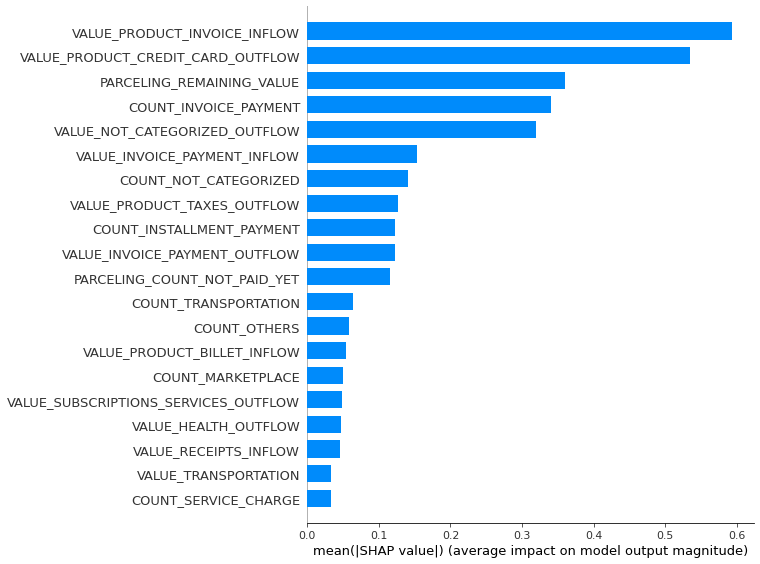

In [53]:
import shap
shap_values = shap.TreeExplainer(model5).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

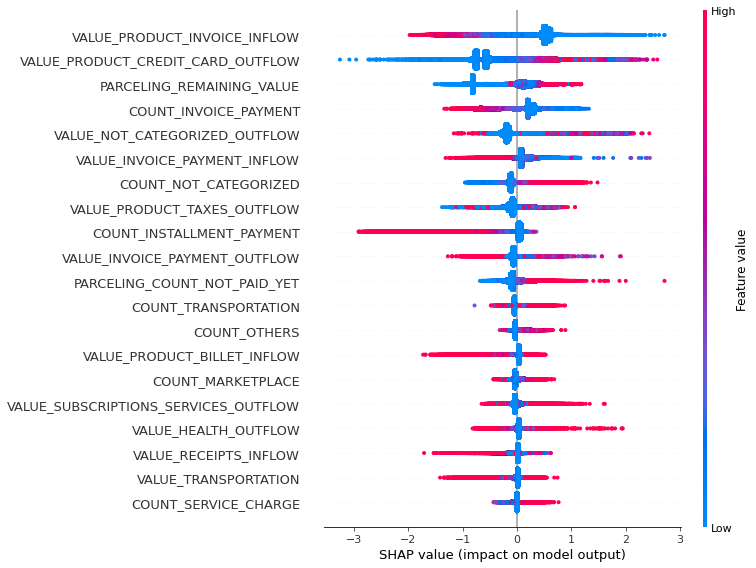

In [54]:
shap.summary_plot(shap_values, X_train)

## 4. Scores

In [30]:
df_test_out = pd.DataFrame({'ClientId': test_ids.ClientId,
                            'Predicted': y_test_pred, 
                            'Proba_Predicted_train': y_test_pred_proba})

In [31]:
df_test_out.head()

ClientId  Predicted  Proba_Predicted_train
265204   2232251          0                  0.401
224882   2091443          1                  0.574
190146   1937030          1                  0.614
277498   2057874          0                  0.000
231400   2225830          0                  0.278

## 5. Metrics

### Roc

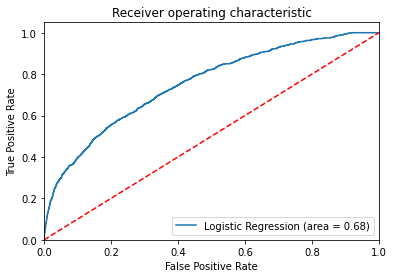

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# roc_auc_score(y_true, y_scores)

logit_roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('../Reports/Model/Log_ROC')
plt.show()

### Confusion Matrix

[6655, 2022, 640, 908]
[[6655 2022]
 [ 640  908]]


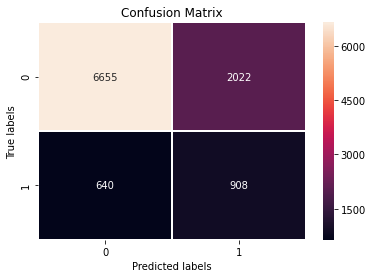

In [41]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print([tn, fp, fn, tp])

cm = confusion_matrix(y_test, y_test_pred)
print(cm)


import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,linewidths=.5, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# plt.savefig('../Reports/Model/Confusion_matrix.png')
# plt.show()

### Coefs

In [42]:
model_features = X_test.columns
coef_dict = {}
for coef, feat in zip(model.coef_[0,:],model_features):
    coef_dict[feat] = coef
    
df_coefs = pd.DataFrame.from_dict(coef_dict, orient='index')

In [43]:
df_coefs.sort_values(by=0)

0
SKProductFirstTransaction_others -9.255
AddressState_goias               -2.602
SKProductFirstTransaction_49.0   -2.264
SKProductFirstTransaction_50.0   -2.078
InstallSource_instagram          -1.191
...                                 ...
SKProductFirstTransaction_11.0    0.940
SKProductFirstTransaction_12.0    1.254
SKProductFirstTransaction_17.0    1.279
SKProductFirstTransaction_13.0    1.406
SKProductFirstTransaction_4.0     3.858

[119 rows x 1 columns]

In [44]:
columns_to_drop = df_coefs.loc[(df_coefs[0]<=0.0001)&(df_coefs[0]>-0.0001)].index

In [45]:
len(columns_to_drop)

12

In [60]:
columns_to_drop

Index(['VALUE_BARS_RESTAURANTS_OUTFLOW', 'VALUE_SEND_OUTFLOW',
       'VALUE_HOME_RENT_OUTFLOW', 'VALUE_OTHERS_OUTFLOW',
       'VALUE_HEALTH_OUTFLOW', 'VALUE_TRANSPORTATION',
       'PARCELING_REMAINING_VALUE', 'VALUE_PRODUCT_OTHERS_OUTFLOW',
       'VALUE_PRODUCT_OBJECTIVES_INFLOW', 'VALUE_PRODUCT_TED_TRANSFER_INFLOW',
       'AddressState_go', 'AddressState_porto'],
      dtype='object')

### Feature Importance

In [80]:
feature_importance = abs(model.coef_[0])

In [83]:
sorted_idx

array([ 79,  90,  45,  13,  47,   6,   8,  36,  16,  43,  15,  11,  10,
        42,   9,  39,   4,   2,   5,   7,  17,   0,  14,  44,  40,  12,
        41,   3,  33,  82,  19,  89,  99,  81,  37,   1,  18,  25,  34,
        46,  21,  24,  29,  56,  78,  23,  22,  83,  35,  20,  31,  27,
        32,  38,  87,  91,  86,  88,  69,  77,  75,  97,  96,  93,  72,
        30,  94,  76,  67,  74,  84,  85,  49,  64,  28,  98,  48,  53,
        73,  26,  55,  68,  92,  66,  62,  57,  51,  59,  63,  54,  61,
        70,  71,  50,  58, 109, 100,  60,  95,  52, 106, 108, 116, 115,
       114, 117, 104, 110, 107, 101,  65, 102, 105, 103, 113, 112,  80,
       111, 118])

In [121]:
import numpy as np
coefs = abs(model.coef_[0])
coefs = 100.0 * (feature_importance / feature_importance.max())
top = np.argpartition(coefs, -30)[-30:]
top_sorted=top[np.argsort(coefs[top])]
print(X.columns[top_sorted])

Index(['Device_motog', 'InstallSource_comparaonlinecredito',
       'InstallSource_organic', 'InstallSource_others', 'Device_iphone',
       'Device_samsg', 'SKProductFirstTransaction_28.0', 'AddressState_sp',
       'Device_xiaomi', 'AddressState_ro', 'Device_moto',
       'SKProductFirstTransaction_17.0', 'SKProductFirstTransaction_27.0',
       'SKProductFirstTransaction_54.0', 'SKProductFirstTransaction_52.0',
       'SKProductFirstTransaction_50.0', 'SKProductFirstTransaction_93.0',
       'SKProductFirstTransaction_13.0', 'SKProductFirstTransaction_37.0',
       'SKProductFirstTransaction_2.0', 'AddressState_to',
       'InstallSource_google', 'SKProductFirstTransaction_11.0',
       'SKProductFirstTransaction_14.0', 'SKProductFirstTransaction_12.0',
       'SKProductFirstTransaction_49.0', 'SKProductFirstTransaction_4.0',
       'AddressState_go', 'SKProductFirstTransaction_39.0',
       'SKProductFirstTransaction_94.0'],
      dtype='object')


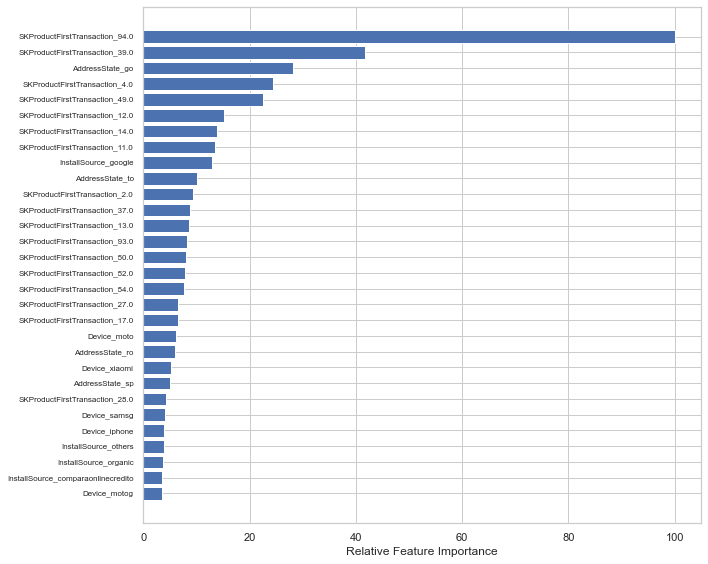

In [122]:
sorted_idx = top_sorted
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(10,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, coefs[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()



In [110]:
# ### Todas
# feature_importance = abs(model.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# sorted_idx = sorted_idx
# pos = np.arange(sorted_idx.shape[0]) + .5

# featfig = plt.figure(figsize=(10,8))
# featax = featfig.add_subplot(1, 1, 1)
# featax.barh(pos, feature_importance[sorted_idx], align='center')
# featax.set_yticks(pos)
# featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
# featax.set_xlabel('Relative Feature Importance')

# plt.tight_layout()   
# plt.show()

Text(0.5, 0, 'Relative Feature Importance')

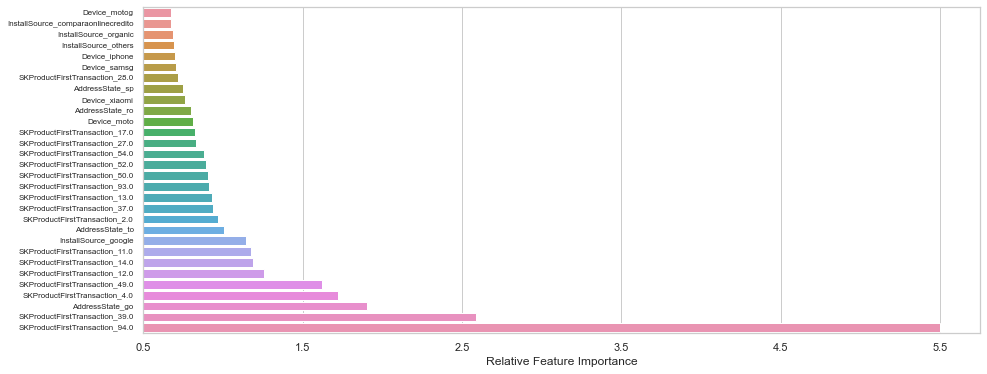

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

coefs = abs(model.coef_[0])
coefs = 100.0 * (feature_importance / feature_importance.max())
top = np.argpartition(coefs, -30)[-30:]
top_sorted=top[np.argsort(coefs[top])]
# print(X.columns[top_sorted])
sorted_idx = top_sorted

f, ax = plt.subplots(figsize=(15, 6))
# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(x=coefs[sorted_idx], y=pos, orient = 'h')
ax.set_xticklabels(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
ax.set_xlabel('Relative Feature Importance')

### Report

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      8677
           1       0.31      0.59      0.41      1548

    accuracy                           0.74     10225
   macro avg       0.61      0.68      0.62     10225
weighted avg       0.82      0.74      0.77     10225



## 6. Função de GH

In [51]:
def get_gh(x):
    if 0<=x<0.1:
        return 10
    elif 0.1<=x<0.2:
        return 9
    elif 0.2<=x<0.3:
        return 8
    elif 0.3<=x<0.4:
        return 7
    elif 0.4<=x<0.5:
        return 6
    elif 0.5<=x<0.6:
        return 5
    elif 0.6<=x<0.7:
        return 4
    elif 0.7<=x<0.8:
        return 3
    elif 0.8<=x<0.9:
        return 2
    elif 0.9<=x<=1.0:
        return 1
    else:
        return 0
    

In [52]:
df_test_out['GH']= df_test_out['Proba_Predicted_train'].apply(lambda x: get_gh(x))

In [53]:
df_test_out.groupby('GH')['ClientId'].count().reset_index()

GH  ClientId
0   1       136
1   2       197
2   3       287
3   4       777
4   5      1533
5   6      2329
6   7      2530
7   8      1219
8   9       354
9  10       863

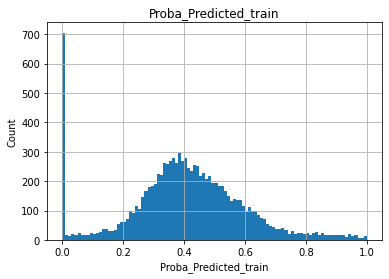

In [54]:
df_test_out['Proba_Predicted_train'].hist(bins = 100)
plt.xlabel("Proba_Predicted_train")
plt.ylabel("Count")
plt.title("Proba_Predicted_train")
plt.savefig("Proba_Predicted_train.png")

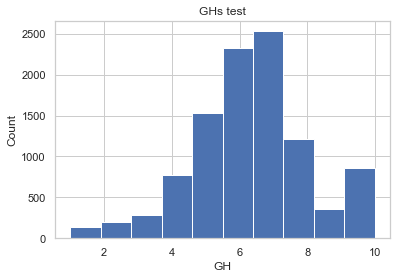

In [73]:
df_test_out['GH'].hist(bins = 10)
plt.xlabel("GH")
plt.ylabel("Count")
plt.title("GHs test")
plt.savefig("GHs.png")

## Save Data

In [56]:
df_test_out.to_csv('../data/processed/result_test.csv', index = False)

In [57]:
# df_train_score.columns